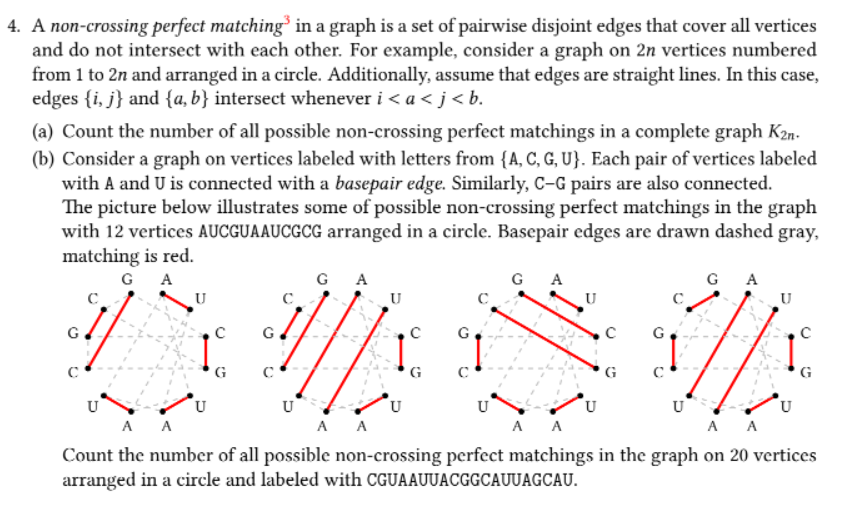

In [4]:
from IPython.display import Image
Image(filename="HW6_4b.png")

## № 4 b)

Решать пункт b будем аналогично пунтку а, но при этом будем учитывать, что можно соединять только определённые вершины: С-G или A-U.

Рассмотрим граф (вершины располагаются по кругу) с n вершинами (в нашем случае длина строки из условия 20, поэтому и вершин в графе 20), где n- чётное число. Пронумеруем все вершины начиная с 1 по часовой стрелке до n.Зафиксируем одну вершину шрава и назовём её 1. Эта вершина будет первой вершиной из нашей строки "CGUAAUUACGGCAUUAGCAU", то есть её "ключ" будет "C", Так же по часовой стрелке, начиная с 1 вершины, "ключами" сделаем элементы строки "CGUAAUUACGGCAUUAGCAU" по порядку (слева направо). 

Рассмотрим поочерёдно все возможные варианты её соединения с другими вершинами. Её можно соединять только с вершиной с тем ключом, который стоит в паре с ключом нашей вершины 1. То есть "C", если ключ нашей вершины "G", и наоборот, и "A", если ключ нашей вершины "U", и наоборот.

Аналогично тому, как мы делали в пункте а, если вершину можно соединить с i-ой, то будем разбивать наш граф на три подграфа: 
1) 1 вершина, соединённая с другой (i-ой)

2) подграф, образованный вершинами со 2 по i-1

3) подграф, образованный вершинами с i-1 по n (в наашем случае 20)

Заметим, что если во втором подграфе (или же в третьем подграфе) количество вершин с "ключом" "А" не совпадает с количеством вершин с "ключом" "U" или если количество вершин с "ключом" "С" не совпадает с количеством вершин с "ключом" "G", то 1 вершину нельзя соединить с i-ой и тогда количество possible non-crossing perfect matching - ов для графа, в котором 1 и i вершина соединены ребром, равно 0. То, как соединены вершины в подграфе 2, не зависит от того, как соединены вершины в подграфе 3, и наоборот. 

Так, какждый раз будем разбивать наш граф на три подграфа и считать количество possible non-crossing perfect matching - ов для каждого из них. Заметим, что для графа с 1 и i-ой вершинами это число равно одному: само ребро (1,i).
Очевидно, что когда мы бедем делить начальный граф, соединяя вершину 1 с другими (удовлетворяющими условию), никакой из случаев не повторится.

Таким образом, количество possible non-crossing perfect matching - ов для нашего графа, в котором 1 вершина соединена с i-ой: 

F(str1, i-2) * F(str2, n - i - 2), 

где F(str, x) - функция, возвращающая количество  possible non-crossing perfect matching - ов для графа с x вершинами (заметим, что х для этой функции - всегда чётное число). str - строка, в которой записаны ключи вершин по порядку того подграфа, у которого мы ищем число non-crossing perfect matching - ов.


Таким образом, количество  possible non-crossing perfect matching - ов для графа с n (чётное число) (и str - ключами вершин по порядку) вершинами задаётся рекуррентно (str1 и str2 - подстроки str):

$$F(str, n) = \sum_{i=0}^{ \frac{n}{2}} F(str1, i-2) * F(str2, n - i - 2)$$

Вершины соединить можно, иначе F(str, х) = 0. 

Начальные данные:  F(str, 0) = 1. (F(str, 2) рассматривать отдельно не надо, так как этот случий тоже разбивается на подслучаи F(str1, 0) и  F(str2, 0))

Теперь посчитаем то, что требуется в условии для нашего конкретного графа. Сделаем это программно, чтобы было быстрее:

In [5]:
def F(graph, x):
    if (x == -1):  # Если граф пустой, то возвращаем 1, чтобы умножение не обнулилось, так как тут данные корректные
        return 1

    count = 0
    for i in range(1, x + 1, 2):
        if ((graph[i] == 'G' and graph[0] == "C" or graph[0] == 'G' and graph[i] == "C" # Если 0 вершину с i соединить можно
                or graph[i] == 'U' and graph[0] == "A" or graph[0] == 'U' and graph[i] == "A")
                and graph[1:i].count('A') == graph[1:i].count('U')       # Если можно разбить на подграфы,
                and graph[1:i].count('C') == graph[1:i].count('G')       # в которых существует необходимый matching
                and graph[i + 1:].count('A') == graph[i + 1:].count('U') # (число вершин совместимых типов вершин равно)
                and graph[i + 1:].count('C') == graph[i + 1:].count('G')):
            
            # Умножаем количество matching-ов в первом и втором подграфах
            count += F(graph[1:i], i - 2) * F(graph[i + 1:], len(graph) - i - 2)
    
    return count


graph = "CGUAAUUACGGCAUUAGCAU"
count = F(graph, len(graph) - 1)
print("Ответ:", count)

Ответ: 21


#### Таким образом, мы получили ответ 21.
### Ответ: 21.